In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
saumons = pd.read_csv('saumons.csv', sep=",")

In [56]:
# Affiche les 5 premières lignes du DataFrame saumons
saumons.head()

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,February,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,February,2.0,6606.0,24856.9,...,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,March,3.0,185.0,703.1,...,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,March,3.0,7008.0,26151.9,...,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,April,4.0,484.0,1912.3,...,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [58]:
# Pour afficher le nombre de lignes, colonnes
saumons.shape

(23143, 21)

In [32]:
# info sur les variables
saumons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                23140 non-null  object 
 1   District ID             23140 non-null  float64
 2   Report order            23140 non-null  float64
 3   Region                  23140 non-null  object 
 4   Method                  23140 non-null  object 
 5   Year                    23140 non-null  float64
 6   Month                   23140 non-null  object 
 7   Month number            23140 non-null  float64
 8   Wild MSW number         23140 non-null  float64
 9   Wild MSW weight (kg)    23140 non-null  float64
 10  Wild 1SW number         23140 non-null  float64
 11  Wild 1SW weight (kg)    23140 non-null  float64
 12  Sea trout number        23140 non-null  float64
 13  Sea trout weight (kg)   23140 non-null  float64
 14  Finnock number          23140 non-null

In [42]:
# On stocke les variables dans une seule variable
variables = saumons.columns
print("Les variables sont : \n",variables)
print("Il y a", variables.size, "variables.")

Les variables sont : 
 Index(['District', 'District ID', 'Report order', 'Region', 'Method', 'Year',
       'Month', 'Month number', 'Wild MSW number', 'Wild MSW weight (kg)',
       'Wild 1SW number', 'Wild 1SW weight (kg)', 'Sea trout number',
       'Sea trout weight (kg)', 'Finnock number', 'Finnock weight (kg)',
       'Farmed MSW number', 'Farmed MSW weight (kg)', 'Farmed 1SW number',
       'Farmed 1SW weight (kg)', 'Netting effort'],
      dtype='object')
Il y a 21 variables.



Statistiques pour 'Wild MSW weight (kg)':
 count     23140.000000
mean       1137.728384
std        3756.927117
min           0.000000
25%          18.100000
50%         136.500000
75%         739.925000
max      102188.000000
Name: Wild MSW weight (kg), dtype: float64


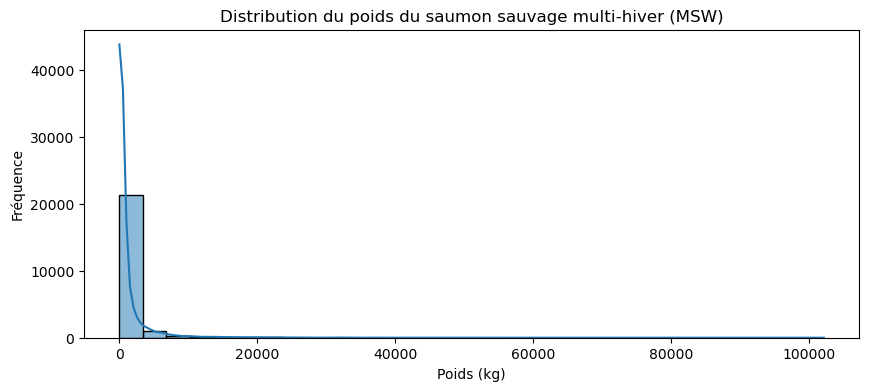

In [64]:
# 1. Variable numérique continue : Wild MSW weight (kg)
print("\nStatistiques pour 'Wild MSW weight (kg)':\n", saumons['Wild MSW weight (kg)'].describe())
plt.figure(figsize=(10,4))
sns.histplot(saumons['Wild MSW weight (kg)'].dropna(), bins=30, kde=True)
plt.title("Distribution du poids du saumon sauvage multi-hiver (MSW)")
plt.xlabel("Poids (kg)")
plt.ylabel("Fréquence")
plt.show()


Statistiques pour 'Wild MSW number':
 count    23140.000000
mean       234.774503
std        730.544329
min          0.000000
25%          4.000000
50%         30.000000
75%        161.000000
max      18942.000000
Name: Wild MSW number, dtype: float64


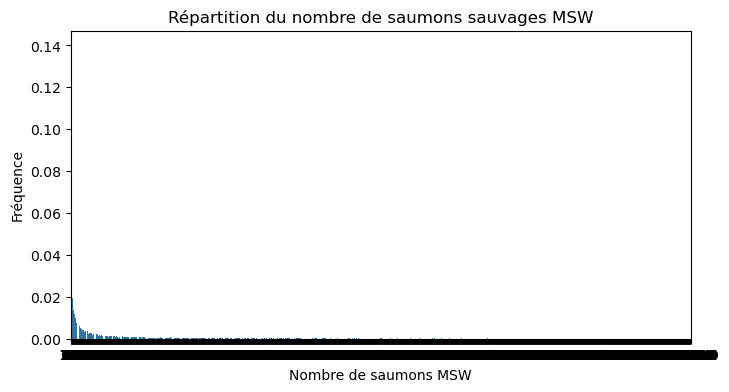

In [104]:
# 2. Variable numérique discrète : Wild MSW number
print("\nStatistiques pour 'Wild MSW number':\n", saumons['Wild MSW number'].describe())
fig, axs = plt.subplots(ncols=1, nrows=1,figsize=(8,4))
sns.barplot(saumons['Wild MSW number'].value_counts(normalize=True).sort_index(), ax =axs)
plt.title("Répartition du nombre de saumons sauvages MSW")
plt.xlabel("Nombre de saumons MSW")
axs.set_ylabel("Fréquence")
plt.show()


Répartition des régions:
 Region
North East        3983
Solway            3746
Moray Firth       3105
North             2744
North West        2610
West Coast        2527
Clyde Coast       2096
East              2061
Outer Hebrides     265
Orkney               3
Name: count, dtype: int64


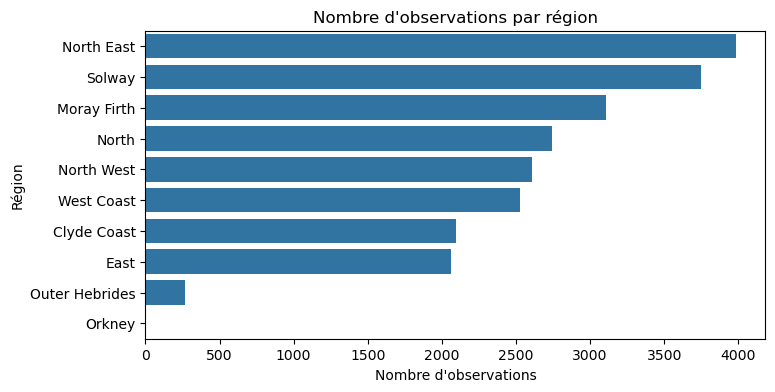

In [78]:
# 3. Variable catégorielle nominale : Region
print("\nRépartition des régions:\n", saumons['Region'].value_counts())
plt.figure(figsize=(8,4))
sns.countplot(y='Region', data=saumons, order=saumons['Region'].value_counts().index)
plt.title("Nombre d'observations par région")
plt.xlabel("Nombre d'observations")
plt.ylabel("Région")
plt.show()


Répartition des mois:
 Month number
2.0     1039
3.0     1461
4.0     2230
5.0     3428
6.0     4462
7.0     4978
8.0     4514
9.0     1026
10.0       1
11.0       1
Name: count, dtype: int64


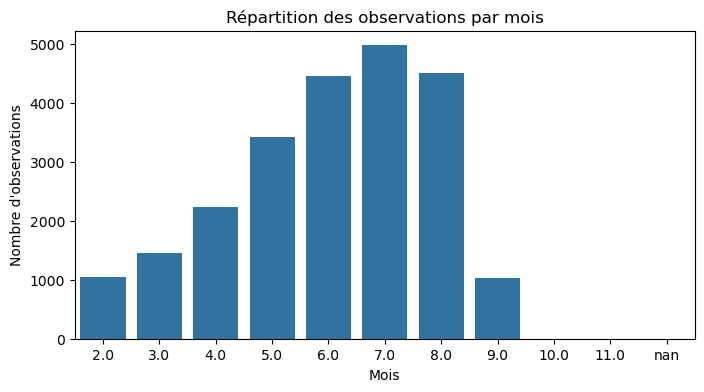

In [70]:
# 4. Variable catégorielle ordinale : Month number
print("\nRépartition des mois:\n", saumons['Month number'].value_counts().sort_index())
plt.figure(figsize=(8,4))
sns.countplot(x='Month number', data=saumons, order=sorted(saumons['Month number'].unique()))
plt.title("Répartition des observations par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'observations")
plt.show()

Wild MSW number
0.0        0.140017
1.0        0.036776
2.0        0.033276
3.0        0.024849
4.0        0.022947
             ...   
13808.0    0.000043
14237.0    0.000043
17776.0    0.000043
18024.0    0.000043
18942.0    0.000043
Name: proportion, Length: 1932, dtype: float64